# KNN vs ANN - Classification
## Evaluating and comparing the performance of each model

### Part 1 : Acquiring data / EDA

For the classification dataset, I chose the wine quality dataset from sklearn. It has 13 chemical properties of wine, and 3 types of wine to be classified.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

#wine = load_wine()
#df = pd.DataFrame(wine.data, columns=wine.feature_names)
#df['target'] = wine.target
#df.to_csv('wine_quality.csv')

In [9]:
df = pd.read_csv('wine_quality.csv')

In [10]:
df.head()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Description of the dataset : 
* Features
    * Alcohol
    * Malic acid
    * Ash
    * Alcalinity of ash
    * Magnesium
    * Total phenols
    * Flavanoids
    * Nonflavanoid phenols
    * Proanthocyanins
    * Color intensity
    * Hue
    * OD280/OD315 of diluted wines
    * Proline
* Classes (Labels)
    * 0
    * 1
    * 2

In [12]:
df = df.drop('Unnamed: 0', axis=1)
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

No missing data to fill. Also, Unnamed:0 column can be dropped since they just represent indices.

<Axes: >

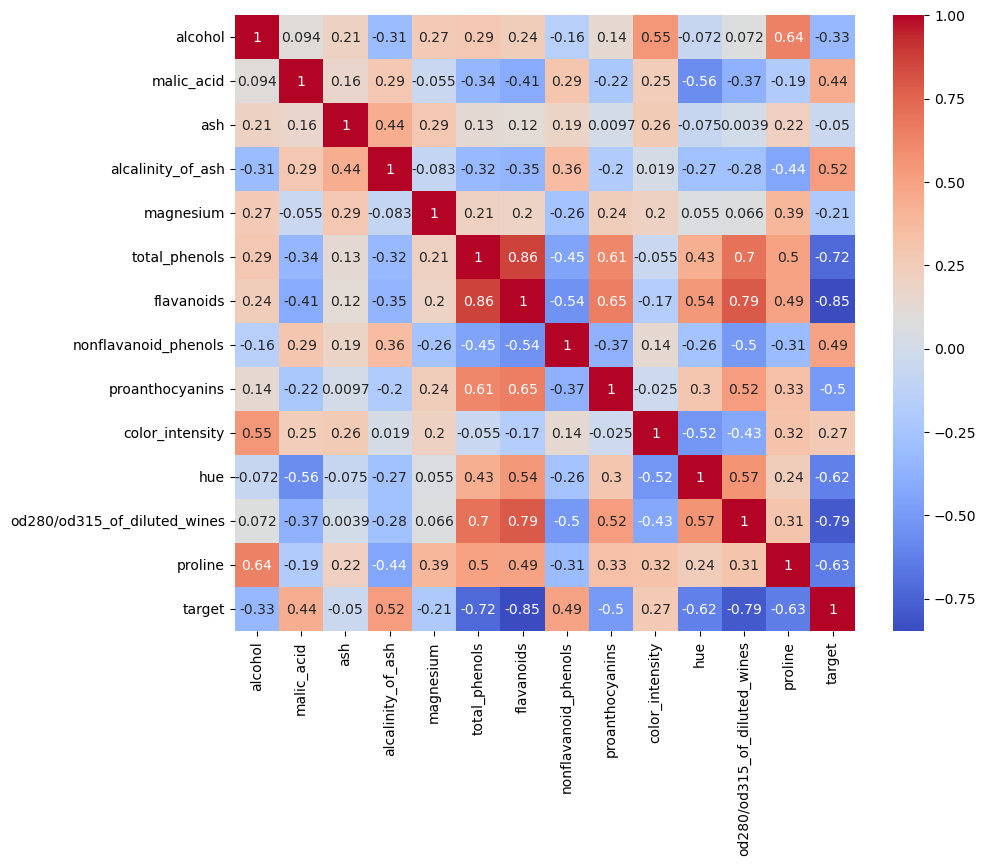

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

According to the heatmap, the following three features were most relevant with the targets : 
#### Positive correlations
- alcalinity_of_ash
- nonflavanoid_phenols
- malic_acid
#### Negative correlations
- total_phenols
- flavanoids
- hue
- od280/od315_of_diluted_wines

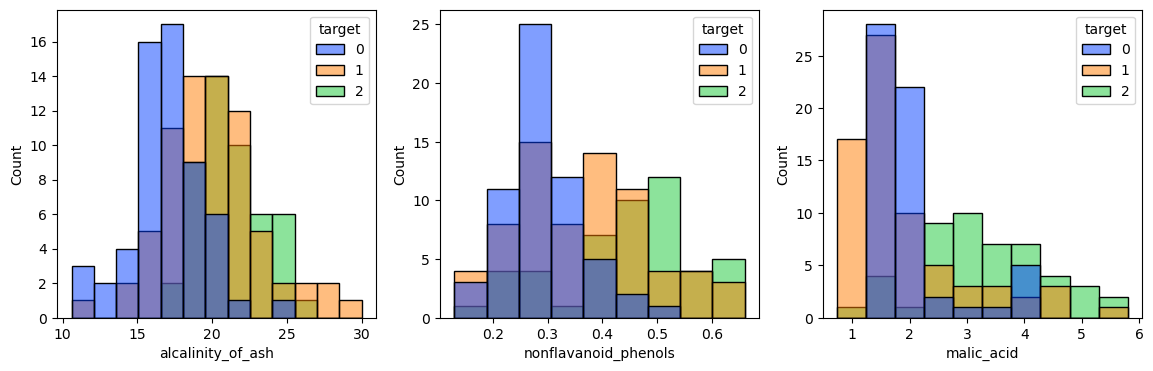

In [16]:
corr_features = ['alcalinity_of_ash', 'nonflavanoid_phenols', 'malic_acid']
fig, axes = plt.subplots(1,3, figsize=(14,4))

for i, col in enumerate(corr_features):
    sns.histplot(data=df, x=col, ax=axes[i], hue='target', palette='bright')
    axes[i].set_xlabel(col)


Without knowing what the features represent, label 0 wine had lower rates of each columns while label 2 had higher rates of the chemicals. Label 1 had diverse distribution of the rates.

<Axes: xlabel='target', ylabel='Count'>

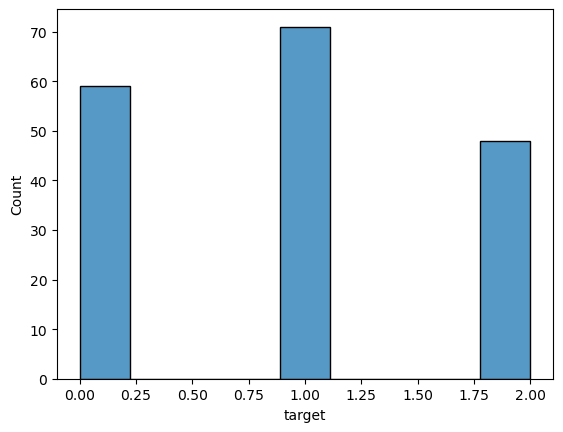

In [18]:
sns.histplot(data=df, x='target')

The distribution of the labels were even.

<Axes: xlabel='alcalinity_of_ash'>

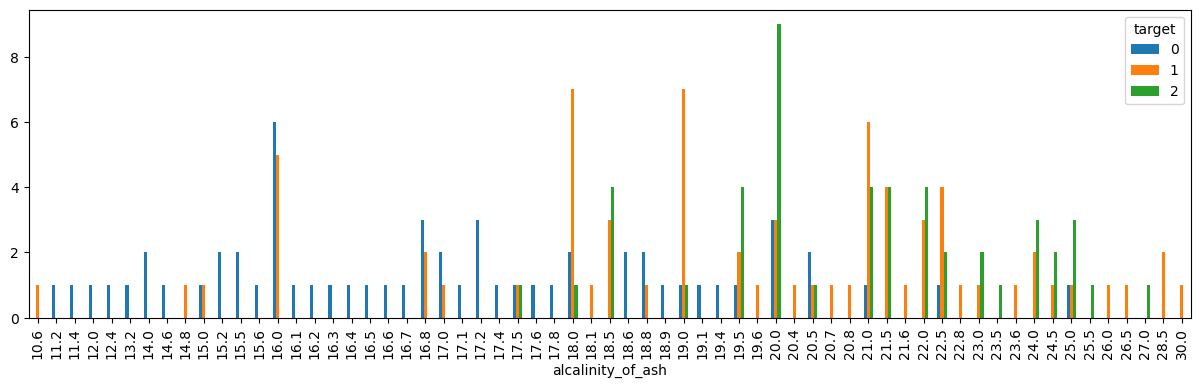

In [20]:
pd.crosstab(df['alcalinity_of_ash'], df['target']).plot(kind='bar', figsize=(15,4))

We can cleary check the distribution of three labels for the feature 'alcalinity_of_ash'. <br/>

<Axes: xlabel='od280/od315_of_diluted_wines', ylabel='Count'>

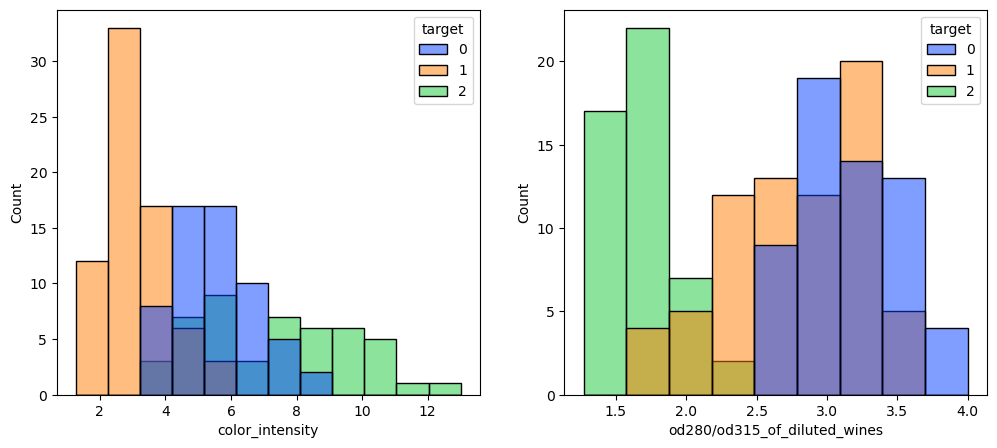

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(ax=axes[0], data=df, x='color_intensity', hue='target', palette='bright')
sns.histplot(ax=axes[1], data=df, x='od280/od315_of_diluted_wines', hue='target', palette='bright')

Next, we can see some clear differences in color_intensity where label 1 had the lowest color intensity, followed by labels 0 and 1. <br/>
The right side of the graph is the feature that had the least correlation, but we could also find some patterns. Label 0 and 1 doesn't seem to have a big difference, but label 2 had much lower values than label 0 and 1.

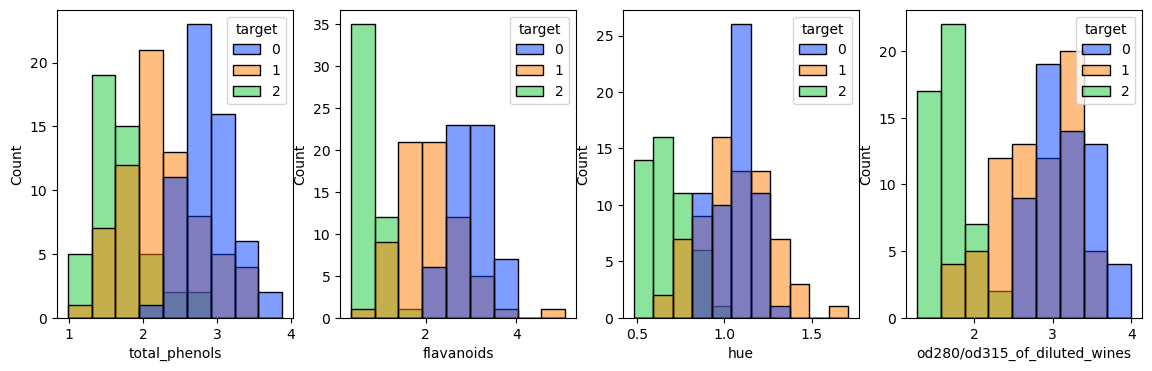

In [24]:
corr_features = ['total_phenols', 'flavanoids', 'hue', 'od280/od315_of_diluted_wines']

fig, axes = plt.subplots(1,4, figsize=(14,4))

for i, col in enumerate(corr_features):
    sns.histplot(data=df, x=col, ax=axes[i], hue='target', palette='bright')
    axes[i].set_xlabel(col)


I don't know what the features exactly represent, but I was able to check on the clear differences of each label. They tend to group to similar values of the features. 

### Part 2 : Training with KNN



In [27]:
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The best performance was MSE = 1.0  with k = 11


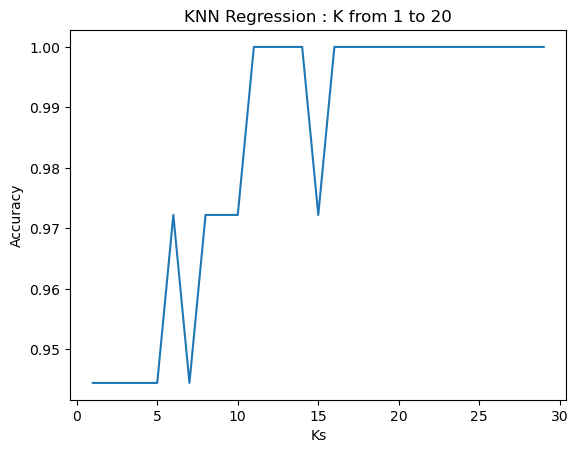

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Ks = 30
mean_acc = np.zeros(Ks-1)


for i in range(1, Ks):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    yhat = knn.predict(X_test)
    mean_acc[i-1] = accuracy_score(y_test, yhat)

plt.plot(range(1, Ks), mean_acc)
plt.ylabel("Accuracy")
plt.xlabel("Ks")
plt.title("KNN Regression : K from 1 to 20")


print( "The best performance was MSE =", mean_acc.max(), " with k =", mean_acc.argmax()+1)

### Part 3 : Training with ANN

In [30]:
X = df.drop('target', axis=1).values
y = df['target'].values


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

(113, 13)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(13, activation='relu')) #input layer
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(3, activation='softmax')) #output layer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

I also need to one-hot encode my y_train data, since we are using the softmax activation and cross_entropy loss.

In [33]:
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

In [34]:
epchs = 500
model.fit(x=X_train, y=y_train_onehot, batch_size=128, epochs=epchs)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step - accuracy: 0.3540 - loss: 1.0995
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3805 - loss: 1.0963
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3894 - loss: 1.0935
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4248 - loss: 1.0910
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4425 - loss: 1.0889
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4779 - loss: 1.0870
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4956 - loss: 1.0856
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4956 - loss: 1.0842
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4956 - loss: 1.0827
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5221 - loss: 1.0811
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3805 - loss: 1.0796
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3805 - l

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0498 


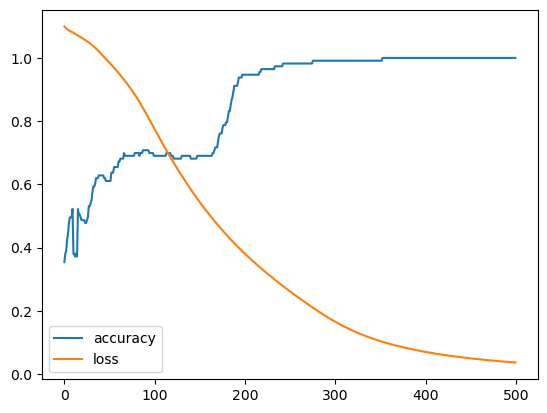

In [35]:
losses = pd.DataFrame(model.history.history)
losses.plot()
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predicted_classes))

test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)

According to our model's history, the accuracy keeps decreasing as we increase epochs. I thought this might indicate a chance of overfitting, so I made a new model with the exact same layers, but instead added a validation data to see as our model trains. <br/>
#### Part 3-2 : ANN (with validation data)
I divided the data as Training Data : 60%, Validation Data : 20%, Testing Data : 20%, and retrained using a new model.

In [37]:
X = df.drop('target', axis=1).values
y = df['target'].values

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=25)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)

(106, 13)


In [70]:
model_val = Sequential()

model_val.add(Dense(13, activation='relu')) #input layer
model_val.add(Dense(7, activation='relu'))
model_val.add(Dense(4, activation='relu'))

model_val.add(Dense(3, activation='softmax')) #output layer
model_val.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_onehot = to_categorical(y_train, num_classes=3)
y_val_onehot = to_categorical(y_val, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

In [72]:
history = model_val.fit(
    X_train, y_train_onehot,
    epochs=epchs,
    batch_size=128,
    validation_data=(X_val, y_val_onehot)
)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step - accuracy: 0.3019 - loss: 1.1334 - val_accuracy: 0.2500 - val_loss: 296.4052
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3019 - loss: 1.1287 - val_accuracy: 0.2500 - val_loss: 294.9721
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3019 - loss: 1.1242 - val_accuracy: 0.2500 - val_loss: 293.7189
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3019 - loss: 1.1200 - val_accuracy: 0.2500 - val_loss: 292.6454
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3019 - loss: 1.1159 - val_accuracy: 0.2500 - val_loss: 291.7427
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3019 - loss: 1.1121 - val_accuracy: 0.2500 - val_loss: 291.0213
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3019 - loss: 1.1084 - val_accuracy: 0.2500 - val_loss: 290.7020
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3208 - loss: 1.1051 - val_accuracy: 0.2

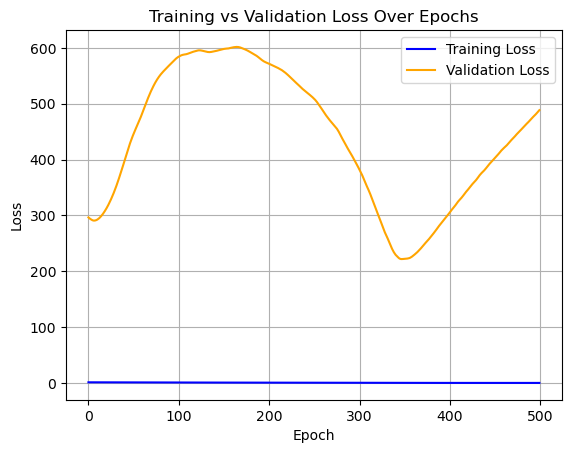

In [82]:
losses_val = pd.DataFrame(model_val.history.history)
plt.plot(losses_val['loss'], label='Training Loss', color='blue')
plt.plot(losses_val['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

The graphs shows an extremely overfitted model. Training loss is close to 1 (accuracy is almost 100%) meaning the model fits the training set perfectly. However, the model is not generalizing to the validation data at all. The model is too complex and might have even learned the noise in the training data as well. 

### Part 4 : Evaluation and comparison of the two models


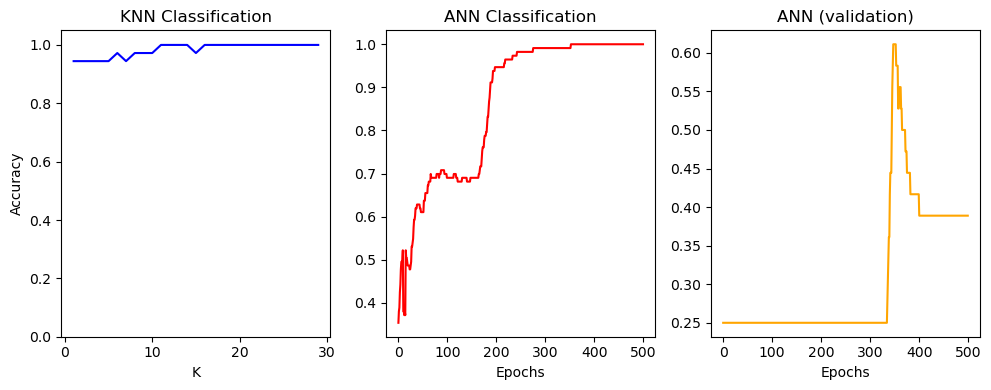

In [94]:
fig, axes = plt.subplots(1,3, figsize=(10,4), )

axes[0].plot(range(1, Ks), mean_acc, color='blue')
axes[0].set_title('KNN Classification')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0,1.05)

axes[1].plot(losses['accuracy'], color='red')
axes[1].set_title('ANN Classification')
axes[1].set_xlabel('Epochs')

axes[2].plot(losses_val['val_accuracy'], color='orange')
axes[2].set_title('ANN (validation)')
axes[2].set_xlabel('Epochs')

plt.tight_layout()


#### Conclusion
Similar like regression, both KNN and ANN performed similarly. However, the ANN model has a high chance of overfit